In [8]:
from utils.tools import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold
np.random.seed(0)
sns.set_theme(palette='Set3')

### XOR dataset

Text(0.5, 1.0, 'XOR')

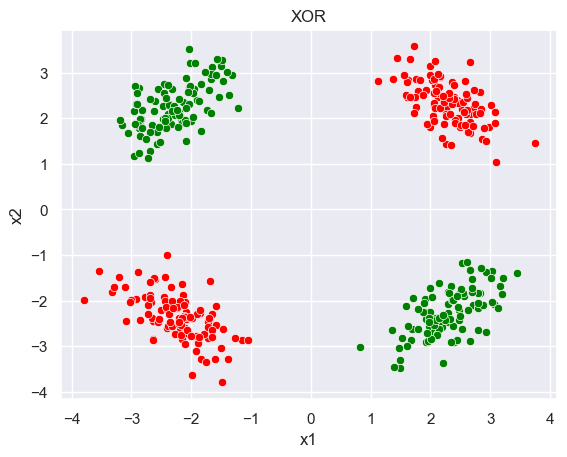

In [58]:
# Training data

X, y = gen_xor_distribution(n = 400)
fig, ax = plt.subplots()
sns.scatterplot(x = X[y == 0,0], y= X[y == 0,1], color = 'red')
sns.scatterplot(x = X[y == 1,0], y= X[y == 1,1], color = 'green')
ax.set_xlabel('x1');ax.set_ylabel('x2');ax.set_title('XOR')

In [87]:
# Fit a boundary using a 2nd order svm kernel, note cost function C here is such that low C = high cost permited and vice-versa
svm = SVC(C = 1000, gamma = 'auto', kernel = 'rbf', degree=2)
svm.fit(X,y)

# Create a sample space from -4 to 4 for each feature
x1,x2 = np.linspace(-4,4,200), np.linspace(-4,4,200)
x1_grid, x2_grid = np.meshgrid(x1,x2)
size = 40000
X_sample = np.concatenate((x1_grid.reshape(size,1),x2_grid.reshape(size,1)), axis = 1)

# Classify each point in the sample space
y_sample = svm.predict(X_sample)

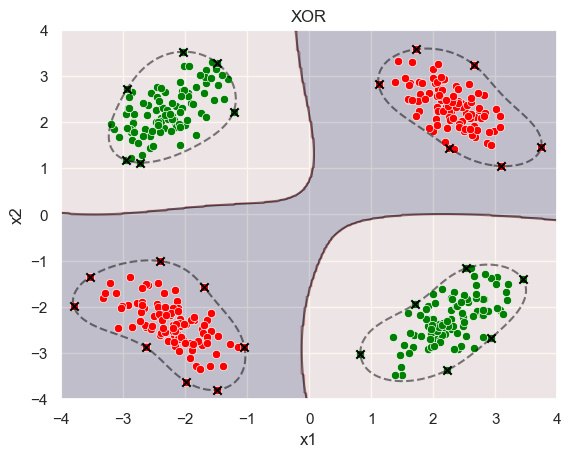

In [88]:
fig, ax = plt.subplots()

# Plot the sample space classification
ax.contourf(x1,x2,y_sample.reshape(200,200), alpha = 0.2)
#sns.scatterplot(x = X_sample[y_sample == 0,0], y = X_sample[y_sample == 0,1], color = 'red', ax = ax)
#sns.scatterplot(x = X_sample[y_sample == 1,0], y = X_sample[y_sample == 1,1], color = 'green',ax = ax)

# Plot the training data that informed the previous classification
sns.scatterplot(x = X[y == 0,0], y= X[y == 0,1], color = 'red')
sns.scatterplot(x = X[y == 1,0], y= X[y == 1,1], color = 'green')
ax.set_xlabel('x1');ax.set_ylabel('x2');ax.set_title('XOR')

# Plot the decision boundaries. The two dashed lines define the extent of the margin. The solid line is the classification boundary itself

Z = np.reshape (svm.decision_function(X_sample), [200,200])
ax.contour(x1,x2, Z, colors = 'k', levels = [-1,0,1], alpha = 0.5, linestyles = ['--','-','--'])

# Plot support vectors

sv = svm.support_vectors_
ax.scatter(x = sv[:,0], y = sv[:,1], c = "black", marker = 'x')

## Circular Dataset

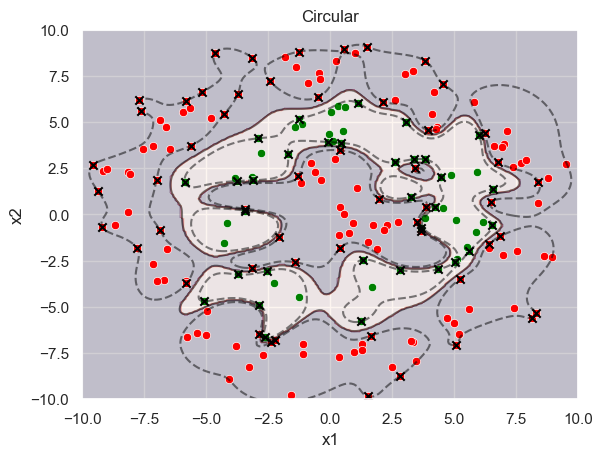

In [9]:
X,y = gen_circular_distribution(200)
svm = SVC(C = 500, gamma = 'auto', kernel = 'rbf', degree=2)
svm.fit(X,y)

# Create a sample space from -10 to 10 for each feature
x1,x2 = np.linspace(-10,10,200), np.linspace(-10,10,200)
x1_grid, x2_grid = np.meshgrid(x1,x2)
size = 40000
X_sample = np.concatenate((x1_grid.reshape(size,1),x2_grid.reshape(size,1)), axis = 1)

# Classify each point in the sample space
y_sample = svm.predict(X_sample)

fig, ax = plt.subplots()

# Plot the sample space classification
ax.contourf(x1,x2,y_sample.reshape(200,200), alpha = 0.2)
#sns.scatterplot(x = X_sample[y_sample == 0,0], y = X_sample[y_sample == 0,1], color = 'red', ax = ax)
#sns.scatterplot(x = X_sample[y_sample == 1,0], y = X_sample[y_sample == 1,1], color = 'green',ax = ax)

# Plot the training data that informed the previous classification
sns.scatterplot(x = X[y == 0,0], y= X[y == 0,1], color = 'red')
sns.scatterplot(x = X[y == 1,0], y= X[y == 1,1], color = 'green')
ax.set_xlabel('x1');ax.set_ylabel('x2');ax.set_title('Circular')

# Plot the decision boundaries. The two dashed lines define the extent of the margin. The solid line is the classification boundary itself

Z = np.reshape (svm.decision_function(X_sample), [200,200])
ax.contour(x1,x2, Z, colors = 'k', levels = [-1,0,1], alpha = 0.5, linestyles = ['--','-','--'])

# Plot support vectors

sv = svm.support_vectors_
ax.scatter(x = sv[:,0], y = sv[:,1], c = "black", marker = 'x')

### Cross Validation (of Circular Distribution)

The KFold class in scikit-learn is a mechanism for splitting a dataset into K consecutive folds for cross-validation purposes. Here's a more intuitive explanation:

When you're training a machine learning model, it's essential to evaluate its performance on data it hasn't seen before. This helps ensure that the model is generalizing well and not just memorizing the training data (a problem known as overfitting). One common way to do this evaluation is through a procedure known as cross-validation (CV).

In K-Fold cross-validation, you divide your dataset into K separate subsets, or "folds". You then train your model K times, each time using a different fold as a testing set and the remaining data as a training set. This way, every data point is used for testing exactly once.

Text(0, 0.5, 'Accuracy [%]')

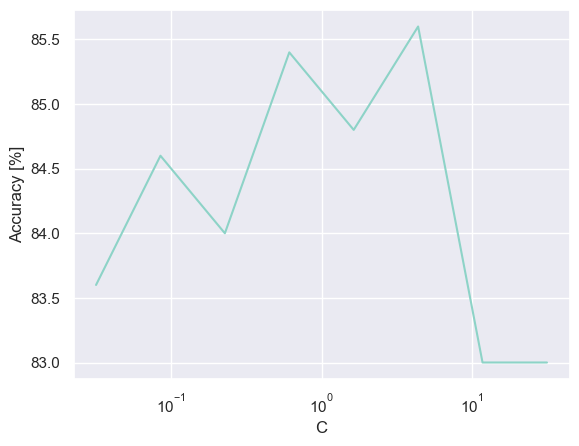

In [25]:
C_array = np.power(10, np.linspace(-1.5,1.5,8))
C_accuracy = np.zeros(len(C_array))

for i,C in enumerate(C_array):
    X,y = gen_circular_distribution(200)
    kf = KFold(n_splits=5, shuffle = True)
    fold = 1
    accuracy = []

    for train_index, test_index  in kf.split(X):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        svm = SVC(C = 500, gamma = 'auto', kernel = 'rbf', degree=2)
        svm.fit(X_train,y_train)
        y_pred = svm.predict(X_test)
        total = len(y_pred)
        correct = (y_pred == y_test).sum()
        percent = round(correct/total, 2)*100
        #print (f'Fold {fold}: {percent} % accurate')
        accuracy.append(percent)
        fold+=1

    #print (f"\nMean accuracy {np.mean(accuracy)} %")
    C_accuracy[i] = np.mean(accuracy)

fig, ax = plt.subplots()
sns.lineplot(x = C_array, y = C_accuracy, ax = ax)
ax.set_xscale('log')
ax.set_xlabel('C'); ax.set_ylabel('Accuracy [%]')